In [4]:
# # Install pandas
# !pip install pandas

# # Install scikit-learn
# !pip install scikit-learn

# # Install SHAP
# !pip install shap

# # Install LIME
# !pip install lime

# # Install matplotlib
# !pip install matplotlib

# # Install seaborn
# !pip install seaborn

# # Install TensorFlow
# !pip install tensorflow
#!pip install --upgrade scikit-learn imbalanced-learn
#!pip install pandas scikit-learn shap lime matplotlib seaborn tensorflow imbalanced-learn

#!pip show scikit-learn imbalanced-learn


In [5]:
#  Import the necessary liabraries  
import pandas as pd
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier  # Import the MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# from imblearn.over_sampling import SMOTE

# SHAP and LIME library for explanability of the EPC label classifications
# import shap  
# import lime
# import lime.lime_tabular


import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import re  # regular expressions


import seaborn as sns

# for deep explainer NN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.layers import Dense, Input, Flatten, Reshape
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam





# Load the data from the CSV excel file
file_path = '.venv/Barcelona/Barcelona.csv' 
df = pd.read_csv(file_path)

 # allow pandas to display all columns
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', 30)


# Display the first few rows of the Data Frame to understand the structure for data manipulation
print('columns',len(df.columns))
print('test')
print("First few rows of the data:")
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '.venv/Barcelona/Barcelona.csv'

## Data Prepreprocessing

In [6]:
# Get the shape of the DataFrame
print("Shape of the DataFrame:", df.shape) ## rows vs columns

# Check data types of each column
print("Data types of each column:")
print(df.dtypes)

print("Number of columns:", len(df.columns))


Shape of the DataFrame: (957126, 30)
Data types of each column:
ADREÇA                                                     object
NOM_PROVINCIA                                              object
METRES_CADASTRE                                           float64
Energia primària no renovable                             float64
Qualificacio d'emissions de CO2                            object
Emissions de CO2                                          float64
Consum d'energia final                                    float64
Cost anual aproximat d'energia per habitatge              float64
VALOR AILLAMENTS                                          float64
VALOR FINESTRES                                           float64
VALOR AILLAMENTS CTE                                      float64
VALOR FINESTRES CTE                                       float64
Qualificació emissions calefacció                          object
Emissions calefacció                                      float64
Qualificació

In [7]:
# Check for missing values in each column
missing_values = df.isnull().sum() 
print("Missing values in each column:")
print(missing_values.to_list()) #convert the totals numbers to a list


Missing values in each column:
[0, 0, 0, 151, 0, 197, 32174, 32174, 32174, 32174, 0, 0, 78451, 75203, 111484, 75205, 98353, 75203, 78420, 75204, 111477, 75292, 97727, 75204, 77803, 75202, 111300, 75255, 0, 0]


In [8]:
# Get summary statistics for numerical columns
print("Summary statistics for numerical columns:")
print(df.describe())

Summary statistics for numerical columns:
       METRES_CADASTRE  \
count    957126.000000   
mean        142.472573   
std         925.278040   
min           0.170000   
25%          57.000000   
50%          72.000000   
75%          99.000000   
max      357792.000000   

       Energia primària no renovable  \
count                  956975.000000   
mean                      204.290356   
std                       291.974997   
min                       -48.210000   
25%                       140.655000   
50%                       187.170000   
75%                       243.730000   
max                     96535.080000   

       Emissions de CO2  \
count     956929.000000   
mean          43.770218   
std          220.702190   
min           -8.170000   
25%           29.140000   
50%           38.940000   
75%           50.780000   
max        98346.000000   

       Consum d'energia final  \
count           924952.000000   
mean               121.131311   
std                

In [9]:
# Print the names of the columns
print("Column names:", df.columns.tolist())

Column names: ['ADREÇA', 'NOM_PROVINCIA', 'METRES_CADASTRE', 'Energia primària no renovable', "Qualificacio d'emissions de CO2", 'Emissions de CO2', "Consum d'energia final", "Cost anual aproximat d'energia per habitatge", 'VALOR AILLAMENTS', 'VALOR FINESTRES', 'VALOR AILLAMENTS CTE', 'VALOR FINESTRES CTE', 'Qualificació emissions calefacció', 'Emissions calefacció', 'Qualificació emissions refrigeració', 'Emissions refrigeració', 'Qualificació emissions ACS', 'Emissions ACS', 'Qualificació energia calefacció', 'Energia calefacció', 'Qualificació energia refrigeració', 'Energia refrigeració', 'Qualificació energia ACS', 'Energia ACS', 'Qualificació energia calefacció demanda', 'Energia calefacció demanda', 'Qualificació energia refrigeració demanda', 'Energia refrigeració demanda', 'DATA_ENTRADA', "Qualificació de consum d'energia primaria no renovable"]


In [10]:
# Defined a dictionary with old names as keys and new names as values
rename_dict = {
    "METRES_CADASTRE": "Property Size (m²)",
    "Emissions de CO2": "CO2 Emissions (kg CO2/m²·year)",
    "Emissions calefacció": "Heating Emissions (kg CO2/m²·year)",
    "Emissions refrigeració": "Cooling Emissions (kg CO2/m²·year)",
    "Emissions ACS": "DHW Emissions (kg CO2/m²·year)",
    "Energia calefacció": "Heating Energy (kWh/m²·year)",
    "Energia refrigeració": "Cooling Energy (kWh/m²·year)",
    "Energia calefacció demanda": "Heating Demand Energy (kWh/m²·year)",
    "Energia refrigeració demanda": "Cooling Demand Energy (kWh/m²·year)",
    "Qualificació de consum d'energia primaria no renovable": "Energy Performance Classification",
    "VALOR AILLAMENTS": "Average Facade Transmittance (W/m²·K)",
    "VALOR FINESTRES": "Average Window Transmittance (W/m²·K)",
    "VALOR AILLAMENTS CTE": "Max Facade Transmittance (CTE) (W/m²·K)",
    "VALOR FINESTRES CTE": "Max Window Transmittance (CTE) (W/m²·K)",
    "Consum d'energia primària no renovable per al servei d'ACS": "Non-Renewable Energy for DHW (kWh/m²·year)",
    "Consum d'energia primària no renovable per al servei d'il·luminació": "Non-Renewable Energy for Lighting (kWh/m²·year)",
}

# Rename the columns in the DataFrame
df.rename(columns=rename_dict, inplace=True)

# Now df has the new column names, which will be used in all further operations
print("Column names:", df.columns.tolist())

Column names: ['ADREÇA', 'NOM_PROVINCIA', 'Property Size (m²)', 'Energia primària no renovable', "Qualificacio d'emissions de CO2", 'CO2 Emissions (kg CO2/m²·year)', "Consum d'energia final", "Cost anual aproximat d'energia per habitatge", 'Average Facade Transmittance (W/m²·K)', 'Average Window Transmittance (W/m²·K)', 'Max Facade Transmittance (CTE) (W/m²·K)', 'Max Window Transmittance (CTE) (W/m²·K)', 'Qualificació emissions calefacció', 'Heating Emissions (kg CO2/m²·year)', 'Qualificació emissions refrigeració', 'Cooling Emissions (kg CO2/m²·year)', 'Qualificació emissions ACS', 'DHW Emissions (kg CO2/m²·year)', 'Qualificació energia calefacció', 'Heating Energy (kWh/m²·year)', 'Qualificació energia refrigeració', 'Cooling Energy (kWh/m²·year)', 'Qualificació energia ACS', 'Energia ACS', 'Qualificació energia calefacció demanda', 'Heating Demand Energy (kWh/m²·year)', 'Qualificació energia refrigeració demanda', 'Cooling Demand Energy (kWh/m²·year)', 'DATA_ENTRADA', 'Energy Perform

In [11]:
selected_feature_name = ["Property Size (m²)", "CO2 Emissions (kg CO2/m²·year)", "Heating Emissions (kg CO2/m²·year)","Cooling Emissions (kg CO2/m²·year)", "DHW Emissions (kg CO2/m²·year)", "Heating Demand Energy (kWh/m²·year)", "Cooling Demand Energy (kWh/m²·year)", "Average Facade Transmittance (W/m²·K)", "Average Window Transmittance (W/m²·K)"]  # List of new feature names
target_feature_name = ["Energy Performance Classification"]   # Ensure this is not included in selected_feature_names

In [12]:
# remove rows that contains columns with missing data
features = selected_feature_name + target_feature_name
selected_df= df[features]
selected_df = selected_df.dropna()

selected_df.describe()

Property Size (m²)  \
count       852700.000000   
mean           143.334671   
std            952.821305   
min              1.000000   
25%             57.000000   
50%             72.000000   
75%            100.000000   
max         357792.000000   

       CO2 Emissions (kg CO2/m²·year)  \
count                   852700.000000   
mean                        42.753077   
std                        150.955455   
min                         -8.170000   
25%                         29.100000   
50%                         38.740000   
75%                         50.240000   
max                      98346.000000   

       Heating Emissions (kg CO2/m²·year)  \
count                       852700.000000   
mean                            28.587572   
std                             17.170640   
min                              0.000000   
25%                             18.050000   
50%                             25.810000   
75%                             35.790000   
max                           2208.020000   

       Cooling Emissions (kg CO2/m²·year)  \
count                       852700.000000   
mean                             1.245178   
std                              1.866165   
min                              0.000000   
25%                              0.520000   
50%                              0.910000   
75%                              1.470000   
max                            582.420000   

       DHW Emissions (kg CO2/m²·year)  \
count                   852700.000000   
mean                         9.757477   
std                         19.777475   
min                          0.000000   
25%                          5.130000   
50%                          8.610000   
75%                         12.910000   
max                      12222.720000   

       Heating Demand Energy (kWh/m²·year)  \
count                        852700.000000   
mean                             96.086551   
std                              46.147536   
min                               0.000000   
25%                              65.730000   
50%                              89.510000   
75%                             119.740000   
max                            3622.300000   

       Cooling Demand Energy (kWh/m²·year)  \
count                        852700.000000   
mean                              6.761635   
std                               8.512891   
min                               0.000000   
25%                               2.970000   
50%                               5.160000   
75%                               8.060000   
max                            1573.100000   

       Average Facade Transmittance (W/m²·K)  \
count                          852700.000000   
mean                                1.546956   
std                                 0.759678   
min                                 0.000000   
25%                                 0.820000   
50%                                 1.690000   
75%                                 2.090000   
max                                 5.880000   

       Average Window Transmittance (W/m²·K)  
count                           8.527000e+05  
mean                            1.919824e+05  
std                             4.377329e+06  
min                             0.000000e+00  
25%                             3.470000e+00  
50%                             3.870000e+00  
75%                             5.000000e+00  
max                             1.000000e+08

In [13]:
input_features = selected_df[selected_feature_name]
output_classification = selected_df[target_feature_name]

print('input_features',input_features)
print('output_classification',output_classification)

input_features         Property Size (m²)  \
0                   120.60   
1                   193.00   
2                   154.00   
3                    52.95   
4                   106.00   
...                    ...   
957121               61.00   
957122               45.00   
957123               87.00   
957124               98.00   
957125              140.00   

        CO2 Emissions (kg CO2/m²·year)  \
0                                11.20   
1                                14.68   
2                                 6.19   
3                                57.16   
4                                 5.45   
...                                ...   
957121                           28.89   
957122                           17.18   
957123                           39.83   
957124                           48.13   
957125                           44.02   

        Heating Emissions (kg CO2/m²·year)  \
0                                     6.35   
1                          

In [14]:
sampled_df = selected_df.sample(frac=0.8, random_state=0)  # 80% of the rows




# Prepare the features and EPC target from the sampled data
X = sampled_df[selected_feature_name]
y = sampled_df[target_feature_name]



C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\u18352805\AppData\Local\Temp\ipykernel_3832\1930457008.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()  # This can help with fitting everything into the figure without overlap


<Figure size 1200x1000 with 0 Axes>

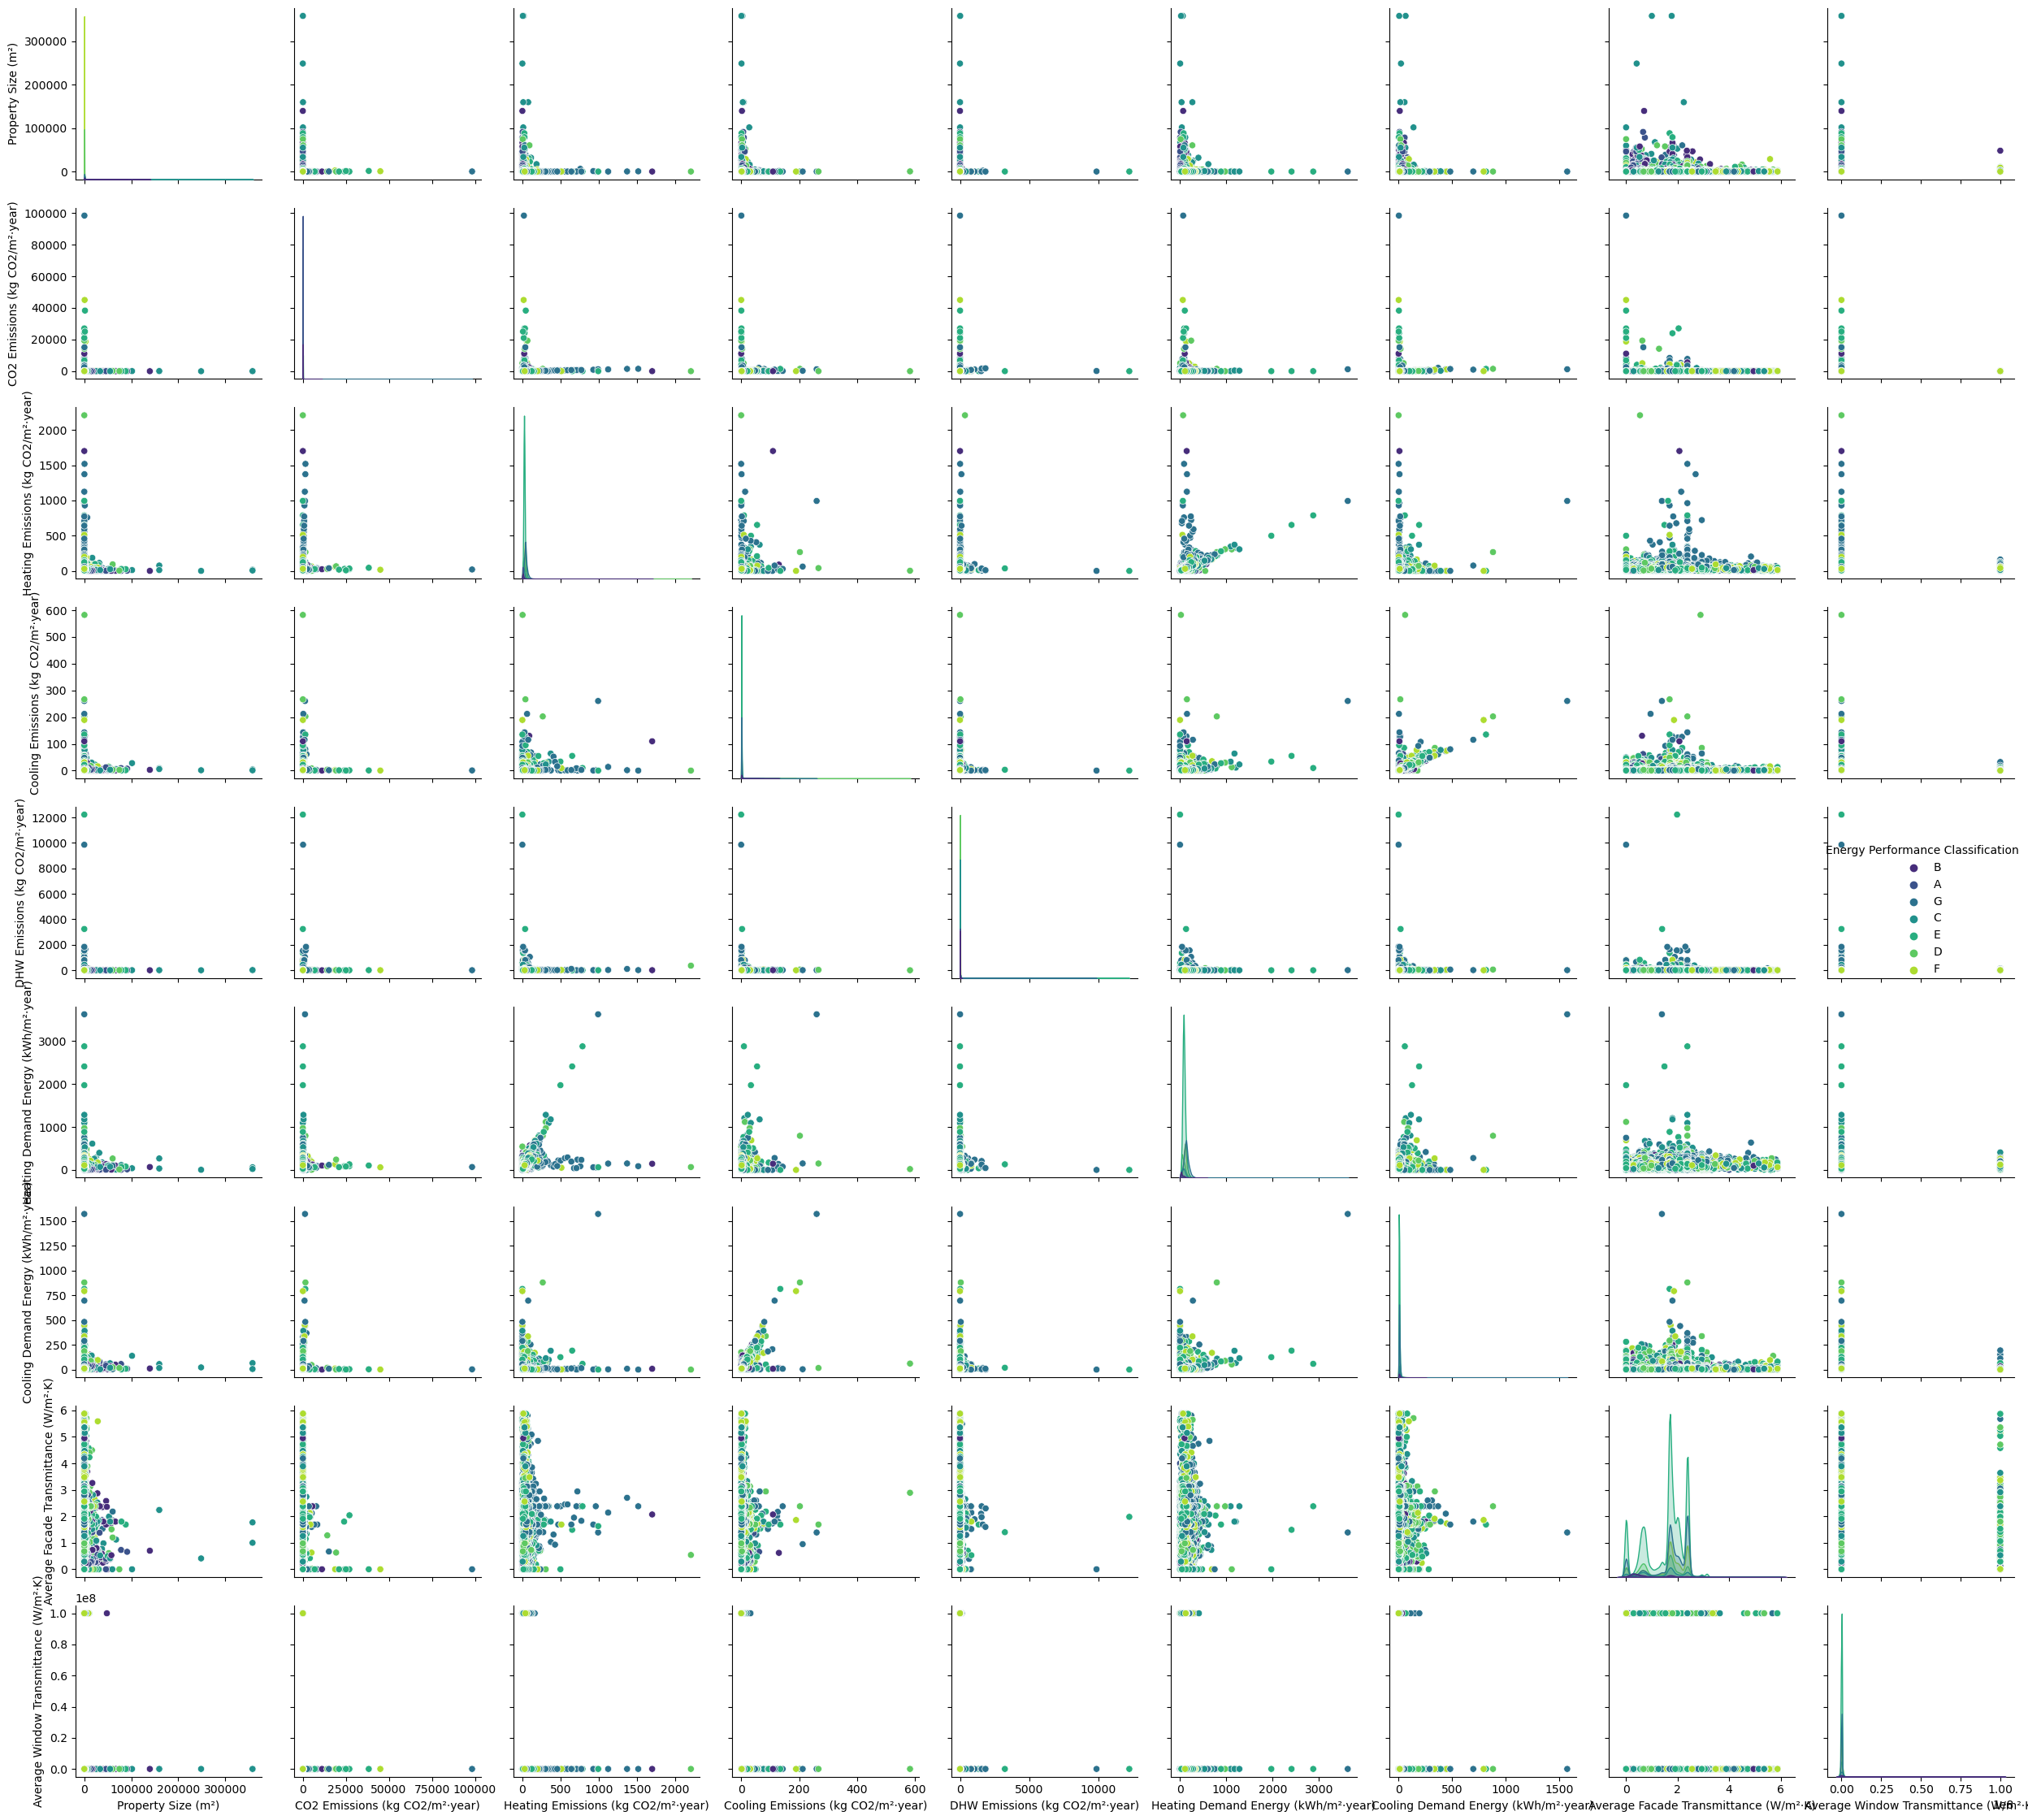

In [18]:
# sns.pairplot(selected_df, hue="Energy Performance Classification", palette="viridis")
# plt.show()



# Set the size of the figure
plt.figure(figsize=(12, 10))  # Adjust these numbers as necessary to fit your display

# Generate a pairplot
pairplot = sns.pairplot(selected_df, hue="Energy Performance Classification", palette='viridis')

# Improve the layout
plt.tight_layout()  # This can help with fitting everything into the figure without overlap

# Show the plot
plt.show()

## Initialize and Fit the ANN Model

C:\Users\u18352805\PycharmProjects\pythonProject\.venv\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross-validation scores: [0.69707071 0.71356345 0.71648606 0.71537288 0.71336105]
Mean cross-validation score: 0.7111708284640436
Final Accuracy: 0.7093865555913124
Confusion Matrix:
 [[60938  7896   853   353   179   130   233]
 [ 6987 46248 11677  2240  1386  1045   999]
 [  330 10794 42945  8620  2418  2546  2930]
 [  122  1262 15302 41840  7077  2124  2856]
 [   32   232  2813  4859 51195  8556  2896]
 [   22   152  1984  1538  5823 49175 11889]
 [   70    71   593   592  1033 10072 58152]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88     70582
           1       0.69      0.66      0.67     70582
           2       0.56      0.61      0.59     70583
           3       0.70      0.59      0.64     70583
           4       0.74      0.73      0.73     70583
           5       0.67      0.70      0.68     70583
           6       0.73      0.82      0.77     70583

    accuracy                           0.7

<Figure size 1200x1000 with 0 Axes>

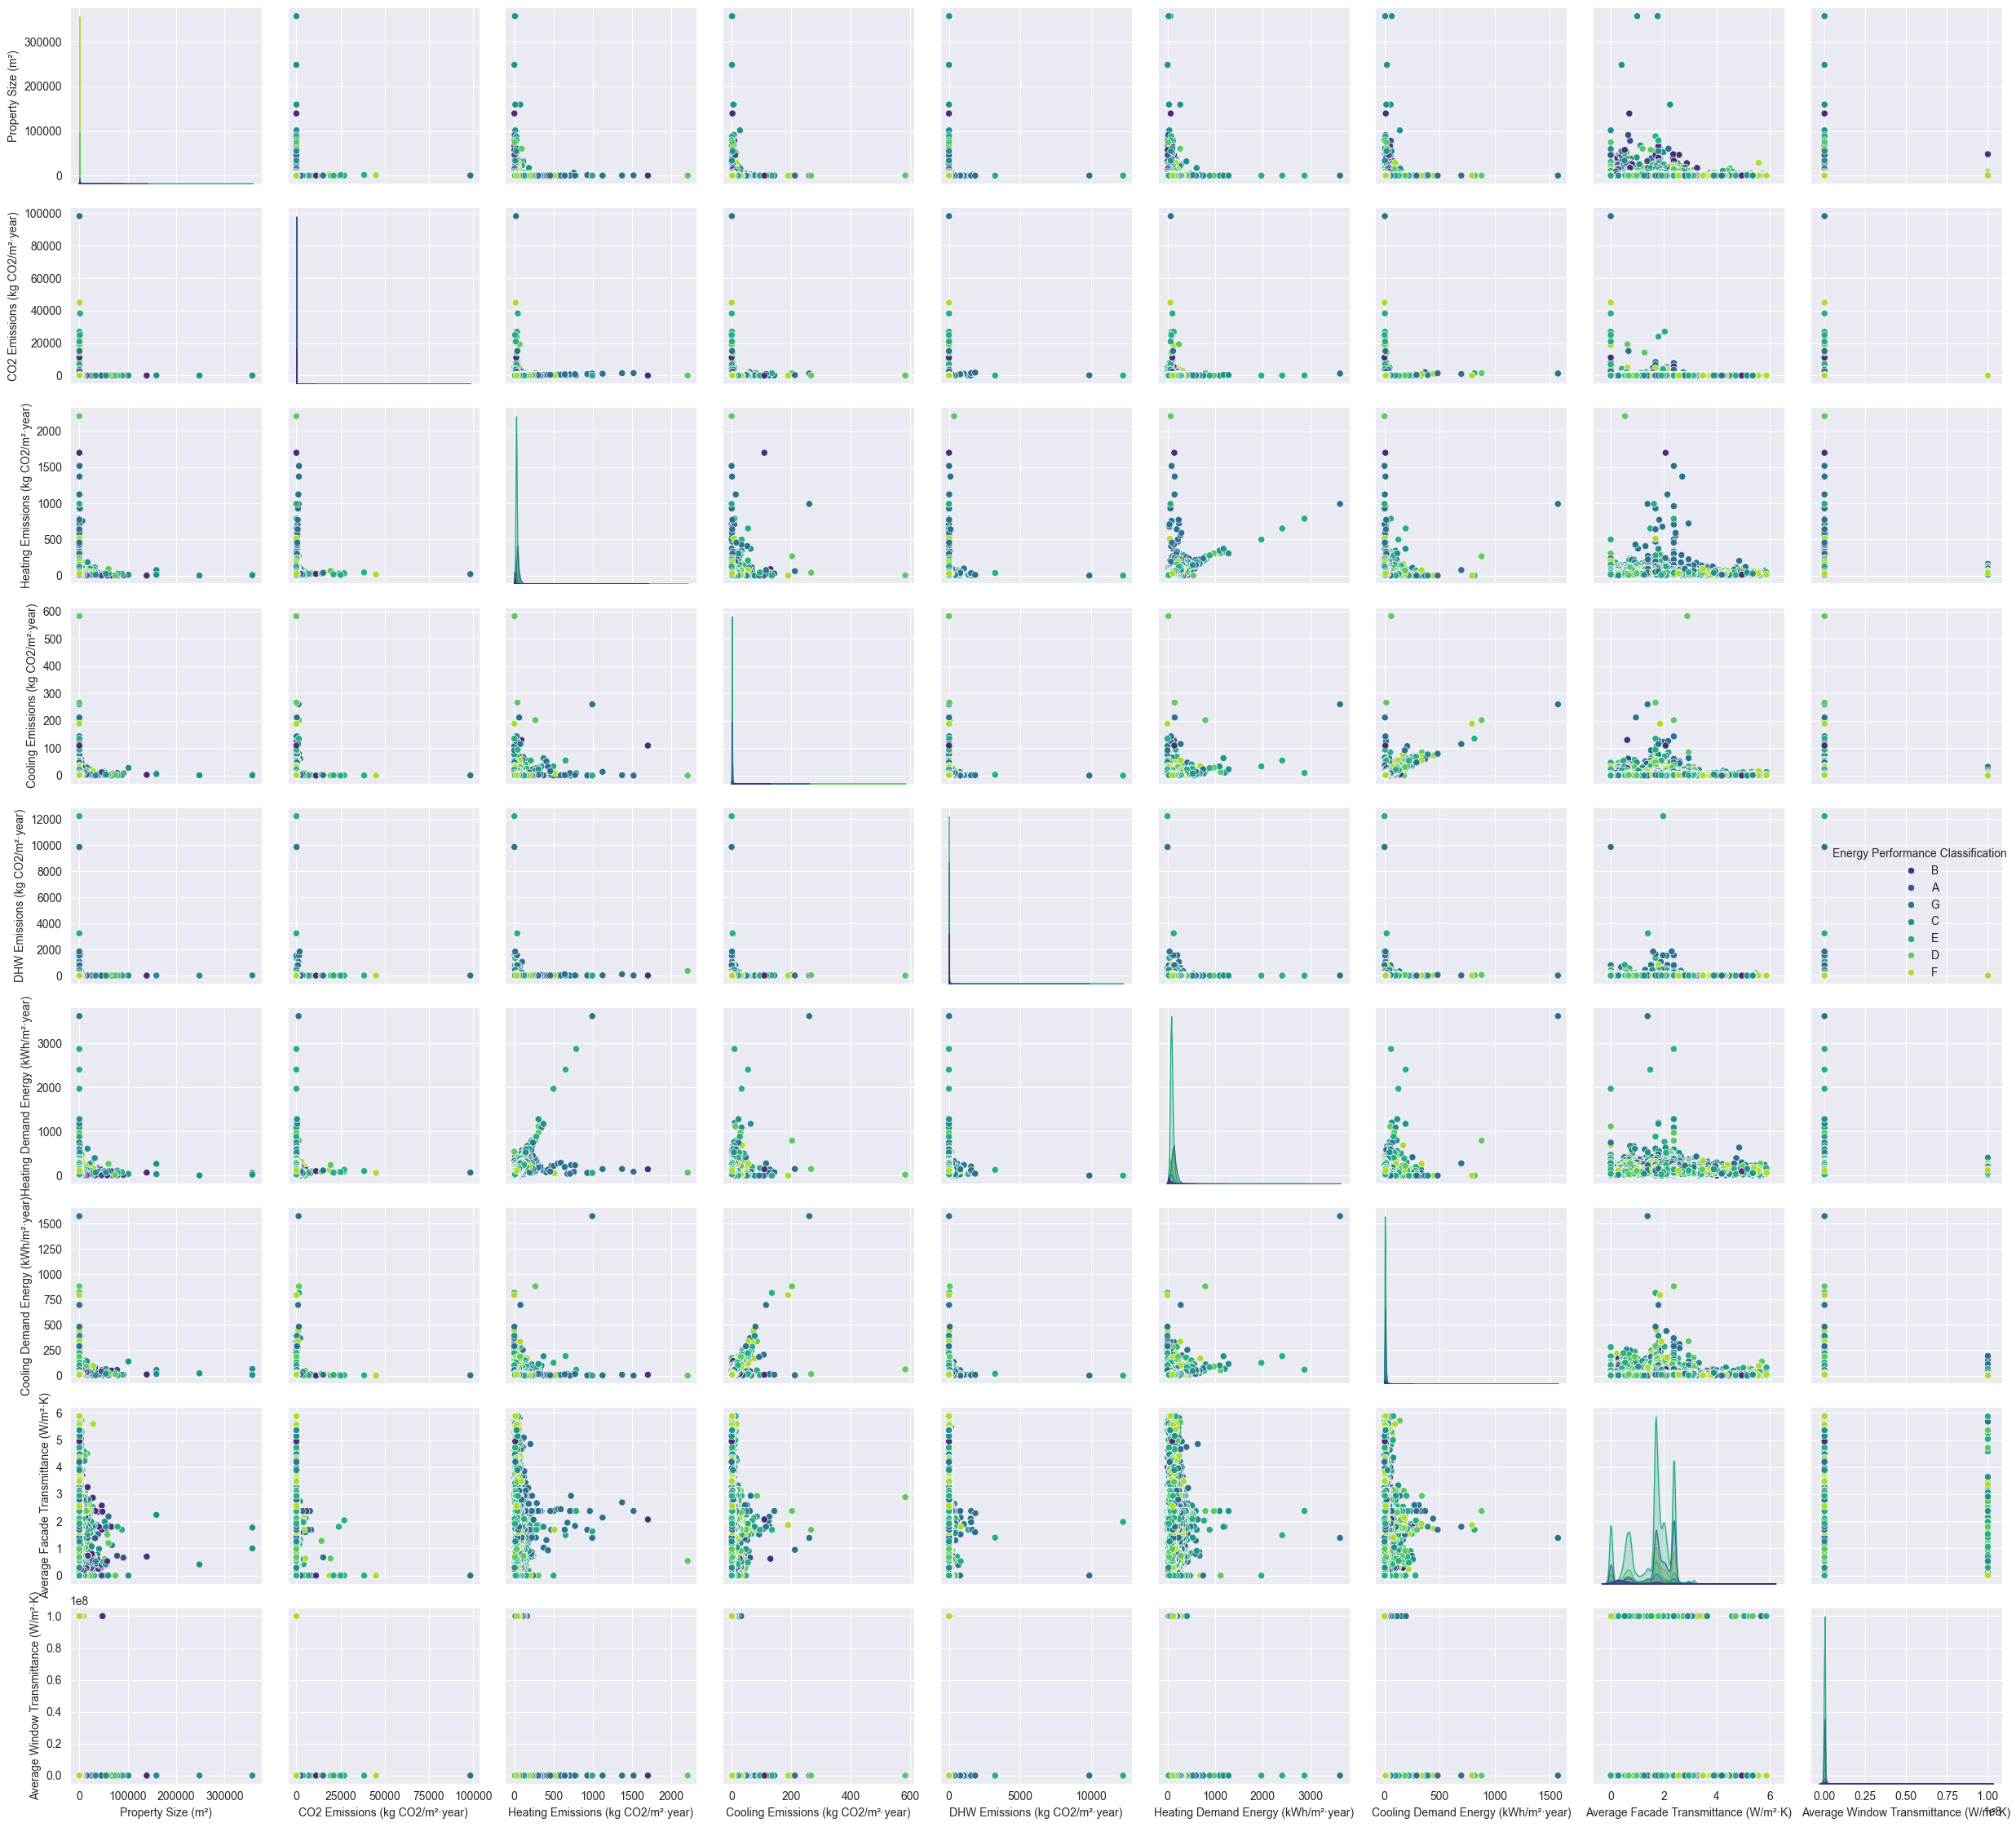

C:\Users\u18352805\AppData\Local\Temp\ipykernel_14356\1208131031.py:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([''] + encoder.inverse_transform(ann_classifier.classes_).tolist())
C:\Users\u18352805\AppData\Local\Temp\ipykernel_14356\1208131031.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([''] + encoder.inverse_transform(ann_classifier.classes_).tolist())


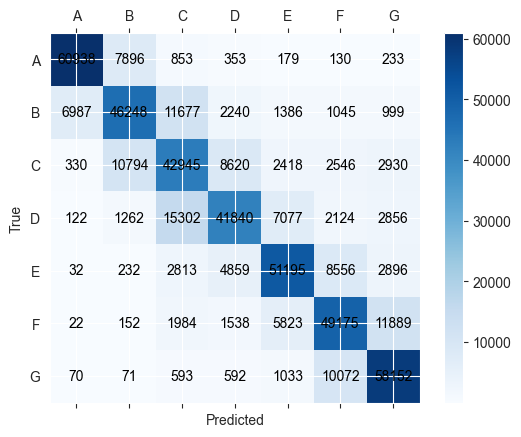

In [16]:




# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Balance the dataset using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

# Initialize the ANN model with a smaller architecture for quicker computation
ann_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, activation='relu', solver='adam', random_state=1)

# Create a pipeline with scaling and the MLP classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', ann_classifier)
])

# Define Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_resampled, y_resampled, cv=skf, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", np.mean(cv_scores))

# Train-test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
print("Final Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot a scatter plot matrix
plt.figure(figsize=(12, 10))  # Adjust these numbers as necessary to fit your display
pairplot = sns.pairplot(selected_df, hue="Energy Performance Classification", palette='viridis')
plt.tight_layout()  # This can help with fitting everything into the figure without overlap
plt.show()

# Plot the confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Fill the matrix with text in each cell
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Set labels based on the classifier's classes, ensuring labels are displayed correctly
ax.set_xticklabels([''] + encoder.inverse_transform(ann_classifier.classes_).tolist())
ax.set_yticklabels([''] + encoder.inverse_transform(ann_classifier.classes_).tolist())
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()









In [3]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the ANN model with a smaller architecture for quicker computation
ann_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, activation='relu', solver='adam', random_state=1)

# Fit the model
ann_classifier.fit(X_train, y_train)

### Evaluate the Model
y_pred = ann_classifier.predict(X_test) # Predicting the test set results
#y_pred = ann_classifier.predict(X_test)

# Generating and outputting the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)




NameError: name 'X' is not defined

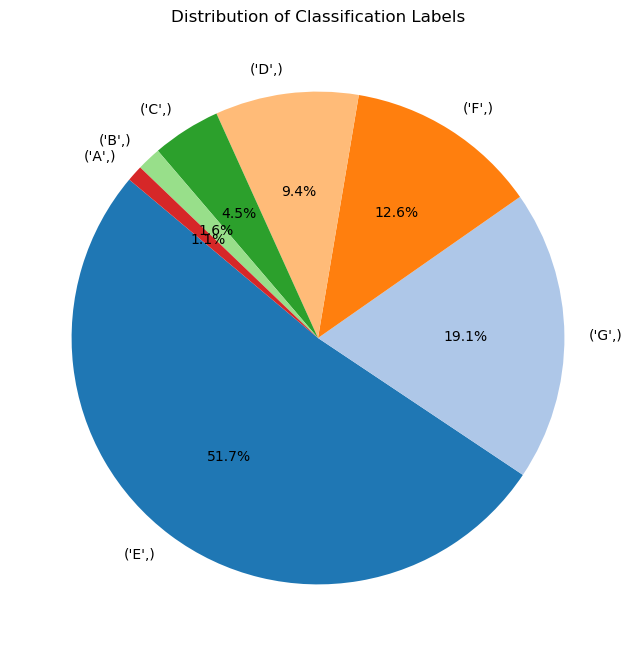

In [13]:
#  'Energy Performance Classification' is the column with the target labels
label_counts = sampled_df[target_feature_name].value_counts()

# Generate the pie chart
plt.figure(figsize=(10, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)
plt.title('Distribution of Classification Labels')
plt.show()

Tell us what this means, what are the implications?

C:\Users\u18352805\AppData\Local\Temp\ipykernel_5128\1526471307.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ann_classifier.classes_.tolist())
C:\Users\u18352805\AppData\Local\Temp\ipykernel_5128\1526471307.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ann_classifier.classes_.tolist())


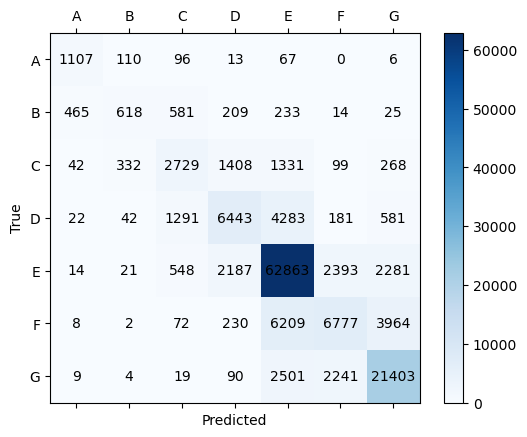

In [14]:
###  better Visualize the Confusion Matrix

# Visualize the confusion matrix in a more interpretable format
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
fig.colorbar(cax)

# fill the matrix with text in each cell
for (i, j), val in np.ndenumerate(conf_matrix):
    ax.text(j, i, f'{val}', ha='center', va='center', color='black')

# Set labels based on the classifier's classes, ensuring labels are displayed correctly
ax.set_xticklabels([''] + ann_classifier.classes_.tolist())
ax.set_yticklabels([''] + ann_classifier.classes_.tolist())
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

Write you analysis on the figure
Re-run your code with improvements and show the results and give anaylisi again

C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_

C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_

Epoch 150/150, Train Accuracy: 0.7475, Validation Accuracy: 0.7480


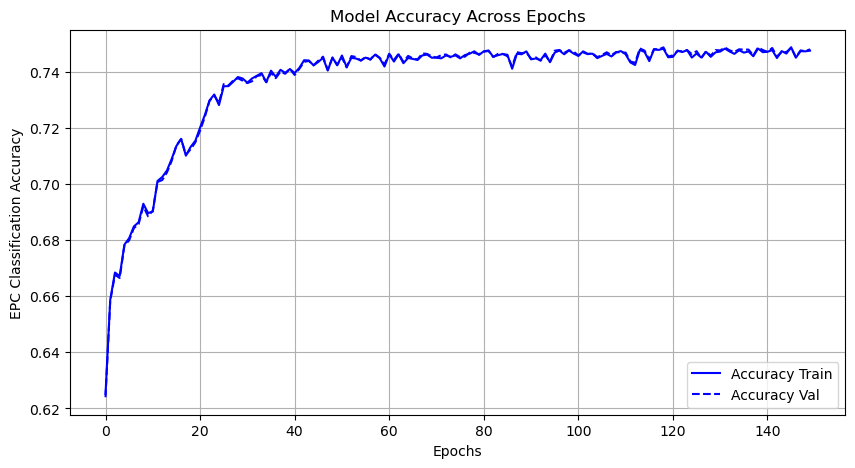

In [15]:
# Initialize the ANN model
hidden_layer_sizes = (60,)
max_iter = 300  
ann_classifier = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                               activation='relu', solver='adam', random_state=0, warm_start=True)

# Lists to store accuracies
train_accuracies = []
val_accuracies = []

# Define the number of epochs
epochs = 150

for epoch in range(epochs):
    ann_classifier.partial_fit(X_train, y_train, classes=np.unique(y_train))  # Fit the model incrementally
    train_pred = ann_classifier.predict(X_train)
    val_pred = ann_classifier.predict(X_test)

    # Compute training and validation accuracy
    train_acc = accuracy_score(y_train, train_pred)
    val_acc = accuracy_score(y_test, val_pred)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

    # Only print the output at the final iteration
    if epoch == epochs - 1:
        print(f'Epoch {epoch+1}/{epochs}, Train Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}')

### Plot Training and Validation Accuracies

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Accuracy Train', linestyle='-', marker='', color='blue')
plt.plot(val_accuracies, label='Accuracy Val', linestyle='--', marker='', color='blue')
plt.title('Model Accuracy Across Epochs')
plt.xlabel('Epochs')
plt.ylabel('EPC Classification Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [16]:
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=X_train.values,
#     feature_names=X,
#     class_names=np.unique(y).tolist(),
#     mode='classification'
# )

# # Select instance
# predicted_class = 'E'
# indices = [i for i, x in enumerate(y_test.values) if x[0] == predicted_class]
# if not indices:
#     raise ValueError("No instance with class E found in the test set.")
# index_to_explain = indices[0]

# instance = X_test.iloc[index_to_explain].values

# # Generate LIME explanation
# explanation = explainer.explain_instance(
#     data_row=instance,
#     predict_fn=ann_classifier.predict_proba
# )
# # Display the explanation

# explanation.show_in_notebook(show_all=False)

# # Assuming 'explanation' is already generated
# exp_list = explanation.as_list()

# # Sorting the explanation list by the absolute contribution values
# exp_list_sorted = sorted(exp_list, key=lambda x: abs(x[1]), reverse=True)

# # Separating feature names and their contributions
# features, scores = zip(*exp_list_sorted)
# colors = ['orange' if x > 0 else 'skyblue' for x in scores]

# plt.figure(figsize=(18, 16))
# bars = plt.barh(features, scores, color=colors)
# plt.xlabel('Feature Contribution')
# plt.title('LIME Explanation - Feature Importance')
# plt.axvline(x=0, color='grey', linewidth=0.8)

# # Adding text labels
# for bar, value in zip(bars, scores):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
#              f'{value:.3f}', 
#              va='center', ha='right' if value < 0 else 'left')

# plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
# plt.show()

C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


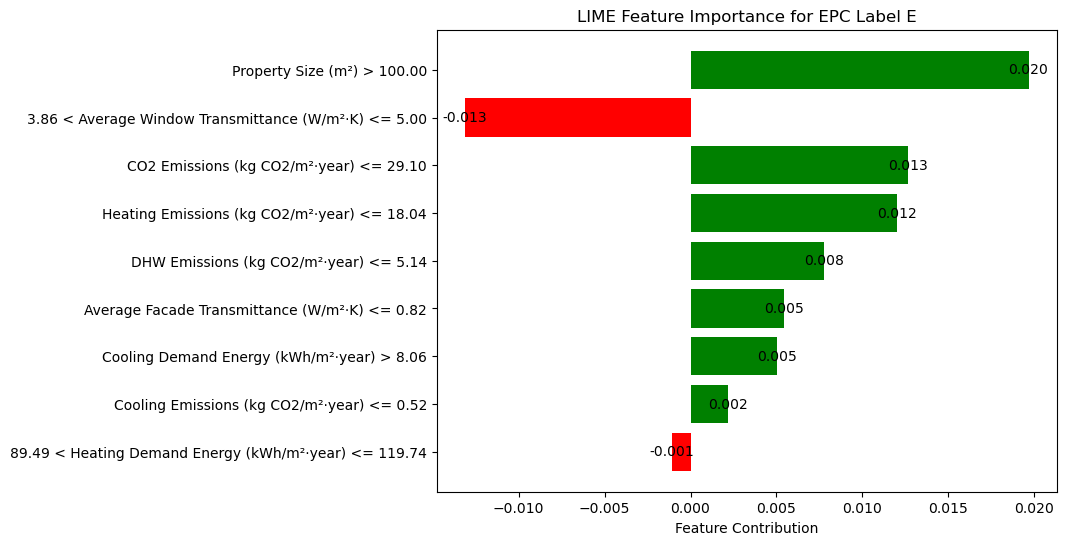

In [32]:
# # X = sampled_df[selected_feature_name]
# # y = sampled_df[target_feature_name]





# Initialize the classifier
ann_classifier = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, activation='relu', solver='adam', random_state=0)
ann_classifier.fit(X_train, y_train)

# Define a prediction function that is compatible with LIME
def model_predict_proba(data):
    return ann_classifier.predict_proba(data)

# Initialize the LIME Explainer
# explainer = LimeTabularExplainer(
#     training_data=X_train.values,
#     feature_names=X_train.columns.tolist(),
#     class_names=np.unique(y_train).tolist(),
#     mode='classification'
# )


explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X,
    class_names=np.unique(y).tolist(),
    mode='classification'
)


predicted_class = 'A'
indices = [i for i, x in enumerate(y_test.values) if x[0] == predicted_class]
if not indices:
    raise ValueError("No instance with class E found in the test set.")
index_to_explain = indices[0]


instance = X_test.iloc[index_to_explain].values # Instance for explanation

# Generate LIME explanation
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=np.unique(y_train).tolist(),
    mode='classification'
)

explanation = explainer.explain_instance(
    data_row=instance,
    predict_fn=ann_classifier.predict_proba,
    labels=[list(np.unique(y_train)).index(predicted_class)]  # ensure the label index is correct
)

# Get the explanation data for the specific class
exp = explanation.as_list(label=list(np.unique(y_train)).index(predicted_class))

# Sort the features by their impact
exp_sorted = sorted(exp, key=lambda x: -abs(x[1]))

# Display the explanation

explanation.show_in_notebook(show_all=False)

# Plot
plt.figure(figsize=(8, 6))
bar_positions = np.arange(len(exp_sorted))
bar_values = [x[1] for x in exp_sorted]
bar_labels = [x[0] for x in exp_sorted]
colors = ['green' if x[1] > 0 else 'red' for x in exp_sorted]

bars = plt.barh(bar_positions, bar_values, align='center', color=colors)
plt.yticks(bar_positions, bar_labels)
plt.xlabel('Feature Contribution')
plt.title('LIME Feature Importance for EPC Label E')


for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, # Adding the value next to each bar
             f'{width:.3f}', 
             ha='center', va='center')

plt.gca().invert_yaxis()  # Invert y axis to have the most important feature at the top
plt.show()



In [18]:
# # Assuming 'explanation' is your LIME explanation object for a specific instance
# # And assuming the internal label for 'E' is determined (let's say it is 4, you need to adjust this according to your model)
# label_for_E = 1

# # Get the explanation for the specific label
# explanation_for_E = explanation.as_list(label=label_for_E)

# # Sort the features by their effect size
# sorted_features = sorted(explanation_for_E, key=lambda x: x[1], reverse=True)

# # Split the feature names and their weights
# feature_names, feature_scores = zip(*sorted_features)

# # Generate colors based on the contribution positive (green) or negative (red)
# colors = ['green' if score > 0 else 'red' for score in feature_scores]

# # Create the plot
# plt.figure(figsize=(1, 8))
# bars = plt.barh(feature_names, feature_scores, color=colors)
# plt.xlabel('Feature Contribution')
# plt.title('Feature Importance for EPC Label E (LIME)')

# # Adding the value next to each bar for clarity
# for bar, value in zip(bars, feature_scores):
#     plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
#              f'{value:.3f}', 
#              va='center', ha='right' if value < 0 else 'left', color='black')

# plt.gca().invert_yaxis()  # Display the most important feature at the top
# plt.show()


In [19]:


# print("Available classes in the explanation:", explanation.available_labels())
# label_for_E = 'E'  # Adjust this as necessary based on the output above
# try:
#     feature_names = explanation.as_list(label=label_for_E)
# except KeyError:
#     print(f"No explanation for label {label_for_E}.")
#     feature_names = []

# # Proceed only if feature names were successfully retrieved
# if feature_names:
#     # Sorting features by their importance
#     sorted_features = sorted(feature_names, key=lambda x: x[1], reverse=True)

#     # Separating names and scores for easier plotting
#     names = [feat[0] for feat in sorted_features]
#     scores = [feat[1] for feat in sorted_features]

#     # Creating the plot
#     plt.figure(figsize=(10, 8))
#     colors = ['green' if x > 0 else 'red' for x in scores]
#     bars = plt.barh(names, scores, color=colors)
#     plt.xlabel('LIME Feature Importance')
#     plt.title('LIME Feature Importance for EPC Label E')

#     # Adding the value next to each bar
#     for bar, value in zip(bars, scores):
#         plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, 
#                  f'{value:.2f}', 
#                  va='center', color='black' if abs(value) > 0.1 else 'white')

#     plt.gca().invert_yaxis()  # To display the highest importance at the top
#     plt.show()
# else:
#     print("No feature importances to display.")


In [20]:
#####################computation time is too long 
# # Split data
# features = sampled_df[selected_feature_name]
# target = sampled_df[target_feature_name]
# X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# # Train the model
# model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=150, activation='relu', solver='adam', random_state=1)
# model.fit(X_train, y_train)

# # Initialize SHAP Explainer
# explainer = shap.KernelExplainer(model.predict_proba, shap.sample(X_train, 100))  # Using 100 samples for speed

# # Compute SHAP Values for the test set
# shap_values = explainer.shap_values(X_test)

# # Filter for instances classified as 'E'
# predicted_E = model.predict(X_test) == 'E'
# X_test_E = X_test[predicted_E]
# shap_values_E = explainer.shap_values(X_test_E)

# # Visualize the SHAP values for 'E' classification
# shap.summary_plot(shap_values_E, X_test_E, feature_names=X_test.columns)

In [21]:
!pip install tensorflow


In [22]:
#############TAKES LONG TO COMPUTE

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# # Train the model
# model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, activation='relu', solver='adam', random_state=1)
# model.fit(X_train, y_train)

# # Use K-Means to summarize the training data for SHAP
# background_data = shap.kmeans(X_train, 10)  # Summarize with 10 centroids

# # Initialize SHAP KernelExplainer using the K-Means summary
# explainer = shap.KernelExplainer(model.predict_proba, background_data)

# # Compute SHAP Values for the test set (might still be computationally intensive depending on the test set size)
# shap_values = explainer.shap_values(X_test)

# # Filter for instances predicted as 'E'
# predictions = model.predict(X_test)
# predicted_E = predictions == 'E'
# X_test_E = X_test[predicted_E]

# if any(predicted_E):
#     shap_values_E = explainer.shap_values(X_test_E)

#     # Visualize the SHAP values for 'E' classification
#     shap.summary_plot(shap_values_E, X_test_E, feature_names=X_test.columns)
# else:
#     print("No instances of 'E' were predicted in the test set.")

In [23]:
# # Define a function that returns the probability predictions from the model
# def model_proba(data):
#     return model.predict_proba(data)

# # Using a smaller background dataset to speed up computation
# background = shap.sample(X_train, 50)  # Reducing the sample size from 100 to 50

# # Initialize the SHAP KernelExplainer with the wrapper function
# explainer = shap.KernelExplainer(model_proba, background)

# # Calculate SHAP values in batches
# batch_size = 50  # Adjust based on your system's memory and performance characteristics
# shap_values = []
# for start in range(0, len(X_train), batch_size):
#     batch = X_train.iloc[start:start+batch_size]
#     batch_shap_values = explainer.shap_values(batch)
#     shap_values.append(batch_shap_values)

# # Concatenate the batch results
# shap_values = np.concatenate(shap_values, axis=1)

# # Assuming the index of class 'E' is known (e.g., index 1)
# mean_shap_values = np.mean(shap_values[1], axis=0)  # Adjust the class index as necessary

# # Plot the mean SHAP values
# shap.summary_plot(mean_shap_values, X_train.columns, plot_type="bar")

In [24]:

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y) # Encode the target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define and train the model
model = MLPClassifier(hidden_layer_sizes=(50,), max_iter=300, activation='relu', solver='adam', random_state=1)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


C:\Users\u18352805\AppData\Local\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.7400463234431804


In [25]:
# # Convert MLPClassifier to Keras model
# input_dim = X_train.shape[1]
# output_dim = len(np.unique(y_train))

# model = Sequential()
# model.add(Input(shape=(input_dim,)))
# model.add(Dense(50, activation='relu'))
# model.add(Dense(output_dim, activation='softmax'))

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Convert target labels to one-hot encoded vectors
# y_train_one_hot = to_categorical(LabelEncoder().fit_transform(y_train))
# y_test_one_hot = to_categorical(LabelEncoder().fit_transform(y_test))

# # Train the Keras model
# model.fit(X_train, y_train_one_hot, epochs=150, batch_size=32, verbose=0)

# # Select the instance to explain
# predicted_class = 'G'
# indices = [i for i, x in enumerate(y_test) if x == predicted_class]
# if not indices:
#     raise ValueError("No instance with class G found in the test set.")
# index_to_explain = indices[0]

# instance = X_test.iloc[index_to_explain].values.reshape(1, -1)

# # Create a DeepExplainer object
# explainer = shap.DeepExplainer(model, X_train)

# # Generate SHAP values for the instance
# shap_values = explainer.shap_values(instance)

# # Get the class index for the predicted class
# class_index = list(model.predict(instance).argmax(axis=1))

# # Plot the SHAP values for the predicted class
# shap.summary_plot(shap_values[class_index[0]], instance, feature_names=X_train.columns, plot_type='bar', max_display=len(X_train.columns))

In [26]:
# # Convert the sklearn model to a Keras model for compatibility with DeepExplainer
# # def build_model(input_dim, output_dim):
# #     keras_model = Sequential([
# #         Dense(50, input_dim=input_dim, activation='relu'),
# #         Dense(output_dim, activation='softmax')
# #     ])
# #     keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# #     return keras_model

# #keras_model = build_model(X_train.shape[1], len(np.unique(y_encoded)))

# #keras_model.fit(X_train, y_train, epochs=10, verbose=0)  # Train Keras model


# # Use DeepExplainer
# background = X_train.iloc[:100].astype(np.float32).values  # Background dataset for SHAP
# explainer = shap.DeepExplainer(model, background)
# shap_values = explainer.shap_values(X_test.iloc[:100].astype(np.float32))

# # Visualize SHAP values for the class corresponding to label 'G'
# g_class_index = encoder.transform(['G'])[0]  # Assuming 'G' is a class in your target
# shap.summary_plot(shap_values[g_class_index], X_test.iloc[:100], plot_type="bar")

In [27]:
################################################################################

In [28]:
############### Shapley #######################



In [29]:
##### speed up SHAP #############################################################

# Sample data for initial testing and analysis
df_sample = selected_df.sample(frac=0.1, random_state=0)  # Adjust fraction as needed based on computational resources

input_features = X
output_classification = y

# Splitting and training
X_train, X_test, y_train, y_test = train_test_split(input_features, output_classification, test_size=0.2, random_state=0)
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=0)  # Limit the depth of the tree
dt_classifier.fit(X_train, y_train)

# Predicting and evaluating
y_pred = dt_classifier.predict(X_test)


# Check class names and their indices
class_names = dt_classifier.classes_
print("Classes predicted by the model:", class_names)

if 'G' in class_names:
    g_index = list(class_names).index('G')
    print("Index for class 'G':", g_index)
else:
    print("Class 'G' not found in the model's classes.")

Classes predicted by the model: ['A' 'B' 'C' 'D' 'E' 'F' 'G']
Index for class 'G': 6


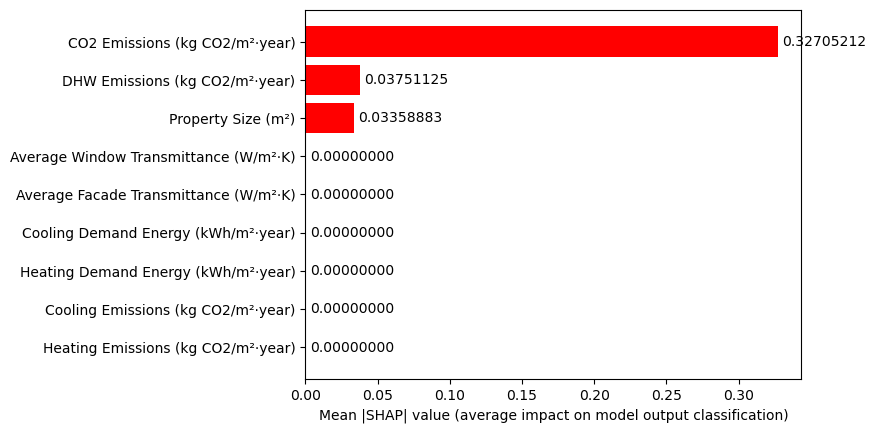

In [30]:
# Initialize the SHAP Explainer
explainer = shap.TreeExplainer(dt_classifier)

# Compute SHAP values for a sample of the training set
shap_sample = X_train.sample(485269, random_state=0)  # Sample size adjusted for computational efficiency 
shap_values = explainer.shap_values(shap_sample)


shap_values_index = shap_values[:, :, 4]  # Extract SHAP values for class 'E' across all samples. the SHAP values have the format (100, 9, 7)

# Calculate the mean SHAP values for each feature
mean_shap = np.abs(shap_values_index).mean(axis=0)

# Sort the features by mean SHAP value
sorted_indices = np.argsort(mean_shap)
sorted_feature_names = np.array(selected_feature_name)[sorted_indices]
sorted_mean_shap = mean_shap[sorted_indices]

# Create the plot manually
#plt.figure(figsize=(12, 8))
fig, ax = plt.subplots()
bars = ax.barh(sorted_feature_names, sorted_mean_shap, color='red')
ax.set_xlabel('Mean |SHAP| value (average impact on model output classification)')

# Adding mean SHAP values as annotations next to the bars
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + max(mean_shap) * 0.01  # Offset label to the right of the bar
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{width:.8f}', va='center')

plt.show()
